## Data and Pre-processing

Greenspace data is downloaded from Ordnance Survey website with selection in 4 tiles that covers all London areas, which are:
1. SP
2. SU
3. TL
4. TQ

Using QGIS we merged the tiles and the data is ready to be pre-processed on the github link [URL]()

### Accessing greenspace data

In [149]:
# Import required libraries

# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt 

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx

#Import datareading modules
from urllib.request import urlopen
import csv
import os
import fiona

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

In [150]:
# Read the file in

url = "github link"
# Read the file in
greenspace_gdf = gpd.read_file(
    "../fsds_GroupWork/data/OS_Open_Greenspace/greenspace_merged.gpkg"
)

In [151]:
greenspace_gdf.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         49739 non-null  object  
 1   function   49739 non-null  object  
 2   distName1  13087 non-null  object  
 3   distName2  46 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      49739 non-null  object  
 7   path       49739 non-null  object  
 8   geometry   49739 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 3.4+ MB


### Data Exploration

In [152]:
# Take a look at the data
greenspace_gdf.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
0,E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E,Playing Field,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492957.940 289585.690 0.000,..."
1,E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E,Allotments Or Community Growing Spaces,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492218.690 289828.830 0.000,..."
2,E56DE843-A69A-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492475.190 289982.670 0.000,..."
3,E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492391.360 289988.480 0.000,..."
4,E56DE848-686E-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((493020.640 290076.310 0.000,..."


In [153]:
# Identify Na values in rows of function
greenspace_gdf[greenspace_gdf.function.isna()]

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry


In [154]:
# Take a look at the data
greenspace_gdf.head(5)

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
0,E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E,Playing Field,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492957.940 289585.690 0.000,..."
1,E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E,Allotments Or Community Growing Spaces,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492218.690 289828.830 0.000,..."
2,E56DE843-A69A-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492475.190 289982.670 0.000,..."
3,E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492391.360 289988.480 0.000,..."
4,E56DE848-686E-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((493020.640 290076.310 0.000,..."


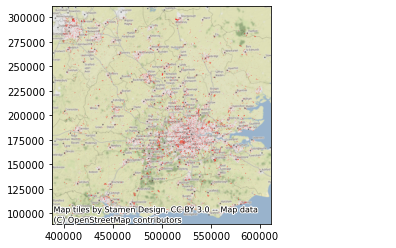

In [155]:
# Plot greenspace geometry
ax = greenspace_gdf.plot(alpha=0.5, color='red');
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=greenspace_gdf.crs)

### Accessing the London Ward Data

In [102]:
# Add London Ward Boundary Data
londonward = gpd.read_file(
    "../fsds_GroupWork/data/londonward.gpkg"
)

In [127]:
# Take a look at the London Ward data
londonward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        657 non-null    object  
 1   GSS_CODE    657 non-null    object  
 2   DISTRICT    657 non-null    object  
 3   LAGSSCODE   657 non-null    object  
 4   HECTARES    657 non-null    float64 
 5   NONLD_AREA  657 non-null    float64 
 6   geometry    657 non-null    geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 36.1+ KB


In [131]:
londonward.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"MULTIPOLYGON (((516401.596 160201.802, 516407...."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"MULTIPOLYGON (((519552.998 164295.600, 519508...."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"MULTIPOLYGON (((518107.499 167303.399, 518114...."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"MULTIPOLYGON (((520336.700 165105.498, 520332...."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"MULTIPOLYGON (((521201.203 169275.505, 521204...."


<AxesSubplot:>

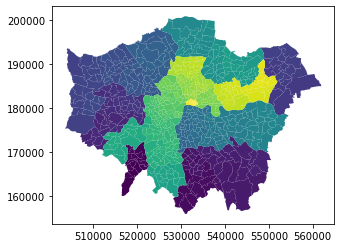

In [143]:
# Plot the London Ward boundary to check
londonward.plot(cmap='viridis')

### Clipping the Greenspace Data

As mentioned before, the data included four tiles that covered London nearby areas. Now we need to clip our data with London Boundary because our study case location is London.

In [103]:
# check if they are in the same crs
print("greenspace", greenspace_gdf.crs)
print("londonward", londonward.crs)

greenspace epsg:27700
londonward epsg:27700


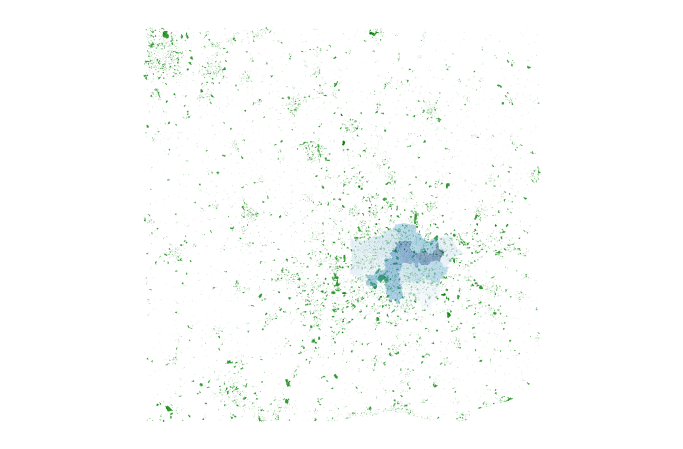

In [160]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_gdf.plot(alpha=.8,
                        color="green",
                         ax=ax,
                    )

londonward.plot(cmap='Blues',
                       ax=ax,
                       alpha=.5,
                    )

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [161]:
# Clip the data using GeoPandas clip
greenspace_clip = gpd.clip(greenspace_gdf, londonward)

# View the first 6 rows and a few select columns
greenspace_clip.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
43299,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((535015.300 159599.140 0.000, 53501..."
43439,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534311.880 160595.980 0.000, 53429..."
43443,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534415.150 160731.550 0.000, 53447..."
43446,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534250.500 160869.900 0.000, 53427..."
43444,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534961.620 160872.400 0.000, 53472..."


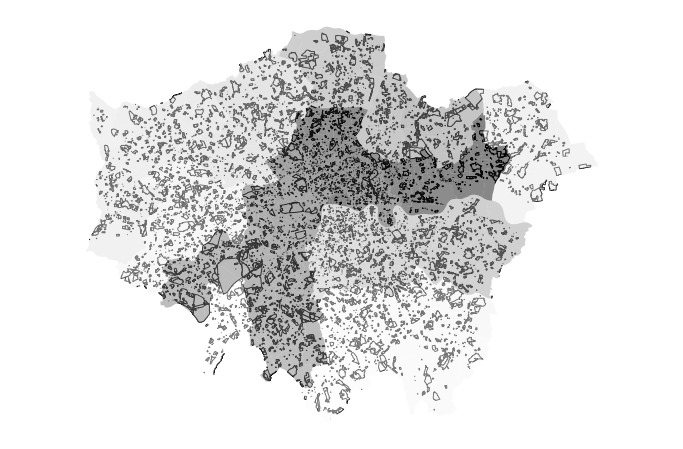

In [162]:
# Plot the clipped data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_clip.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

londonward.plot(cmap="Greys",
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

## Calculating the Greenspace Centroid

In [165]:
# Calculating centroid of greenspace polygon and multipolygon

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

greenspace_centroid = greenspace_clip

greenspace_clip['geometry'] = greenspace_clip['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x)
)

greenspace_centroid.head(5)

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
43299,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534996.280 159576.615)
43439,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534278.211 160594.285)
43443,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534507.096 160783.952)
43446,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534239.463 160835.475)
43444,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534801.546 160893.843)


In [176]:
greenspace_centroid.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10165 entries, 43299 to 27457
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         10165 non-null  object  
 1   function   10165 non-null  object  
 2   distName1  2752 non-null   object  
 3   distName2  10 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      10165 non-null  object  
 7   path       10165 non-null  object  
 8   geometry   10165 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 794.1+ KB


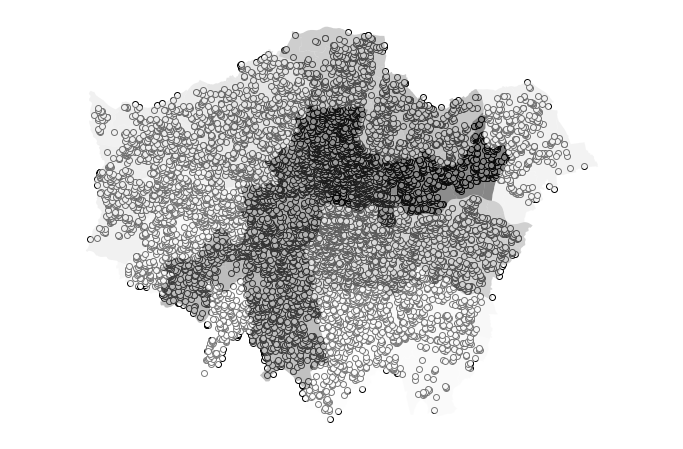

In [173]:
# Plot the greenspace centroid
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_centroid.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax,
                        label = 'Greenspace \nLocations'
                    )

londonward.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

### Calculating the density

We calculate the density of each ward in London to use it as a variable in finding the relationship between tourism preference and greenspace. 

The formula for density is:



### Define greenspace centroid in each ward

First we calculate the points inside the ward area polygon. Since we dont have the same attributes to join, we use spatial join and define every centroids within each ward polygon

Reference: 
https://geopandas.org/en/latest/docs/user_guide/mergingdata.html https://stackoverflow.com/questions/71579502/merging-pandas-file-with-osmnx

In [177]:
greenspace_in_ward = greenspace_centroid.sjoin(londonward, how="inner", predicate='intersects')

greenspace_in_ward.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry,index_right,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA
43299,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534996.280 159576.615),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43439,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534278.211 160594.285),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43443,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534507.096 160783.952),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43446,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534239.463 160835.475),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43444,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534801.546 160893.843),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0


In [175]:
greenspace_in_ward.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10157 entries, 43299 to 30112
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           10157 non-null  object  
 1   function     10157 non-null  object  
 2   distName1    2746 non-null   object  
 3   distName2    10 non-null     object  
 4   distName3    1 non-null      object  
 5   distName4    0 non-null      object  
 6   layer        10157 non-null  object  
 7   path         10157 non-null  object  
 8   geometry     10157 non-null  geometry
 9   index_right  10157 non-null  int64   
 10  NAME         10157 non-null  object  
 11  GSS_CODE     10157 non-null  object  
 12  DISTRICT     10157 non-null  object  
 13  LAGSSCODE    10157 non-null  object  
 14  HECTARES     10157 non-null  float64 
 15  NONLD_AREA   10157 non-null  float64 
dtypes: float64(2), geometry(1), int64(1), object(12)
memory usage: 1.3+ MB


### Converting Local Projections
Before we carry out any calculations we need to convert our point coordinates to a local projection. As you know, the earth is a sphere. A projection is a method of flattening the surface of the earth so we can display it on a map. The problem, however, is that there is no way to flatten the surface of a sphere in a way that all parts are sized proportionately equal.

The only way to get around this is to find a projection that makes the specific part of the world that you are interested in proportionately equal. These are called local UTM Coordinate Referencing System (CRS). Fortunately, OSMnx has a method built into it that allows us to find the correct local UTM.

In [43]:
def get_local_crs(y,x):
    x = ox.utils_geo.bbox_from_point((y, x), dist = 500, project_utm = True, return_crs = True)
    return x[-1]

lon_latitude = 51.509865
lon_longitude = -0.118092
local_utm_crs = get_local_crs(lon_latitude, lon_longitude)

local_utm_crs

<Derived Projected CRS: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Next we import our AirBnb room data and convert it into a Geographic dataframe.

In [44]:
# Create a Geographic data of our 
air_df = pd.read_csv('airbnb_rooms.csv')

# Note below: "crs = 4326" is our way of telling geopandas that the initial projection uses the standard
# longitude latitude coordinates. You can't manipulate the CRS if you haven't set one initially.

air_gdf = gpd.GeoDataFrame(air_df, geometry = gpd.points_from_xy(air_df.longitude, air_df.latitude), crs = 4326)
air_gdf = air_gdf.to_crs(local_utm_crs)

#Convert amenities into local projection (amenities already had an initial CRS set when we downloaded it via OSMnx)
restaurants_gdf = restaurants_gdf.to_crs(local_utm_crs)

FileNotFoundError: [Errno 2] No such file or directory: 'airbnb_rooms.csv'

### Calculating Distance Using a KDTree
So next, we need to iterate through each AirBnb property and work out how many restaurants there are within a 10 minute walk (approximately 1km). 
I do this using a K-D Tree. Explaining how K-D Trees work is outside the scope of this article, but in short, they're a super efficient way of searching through our 80,000 AirBnb rooms and 6,000 restaurants and figuring out which ones are close to which. First we set up the tree of all restaurant points.

In [ ]:
import time
from scipy import spatial
from scipy.spatial import KDTree

# Turn long/lats into an array for Scipy
Lon = restaurants_gdf.geometry.apply(lambda x: x.x).values
Lat = restaurants_gdf.geometry.apply(lambda x: x.y).values
coords = list(zip(Lat,Lon))

tree = spatial.KDTree(coords) # Create a KDTree of all tube stations

Then we create a function which we will run on each of our AirBnb rooms. The function will query the tree, and find the 500 closest restaurants along with calculating their distances from the AirBnb property. We use a figure of 500 in the hope that no property has more than 500 restaurants close to it.

In [ ]:
def find_points_closeby(lat_lon, k = 500, max_distance = 1000 ):
  '''
  Queries a pre-existing kd tree and returns the number of points within x distance
  of long/lat point.
  lat_lon:        A longitude and latitude pairings in the (y, x) tuple form.
  k:              The maximum number of closest points to query
  max_distance:   The maximum distance (in meters)
  '''
  
  results = tree.query((lat_lon), k = k, distance_upper_bound= max_distance)
  zipped_results = list(zip(results[0], results[1]))
  zipped_results = [i for i in zipped_results if i[0] != np.inf]
  
  return len(zipped_results)

And finally, we set up a timer and apply the function to each AirBnb row

In [ ]:
# Set up a timer 
import time 
t0 = time.time()

#Apply the function
air_gdf['restaurants'] = air_gdf.apply(lambda row: find_points_closeby(
  (row.geometry.y, row.geometry.x)) , axis = 1)

# Report the time
time_passed = round(time.time() - t0, 2)
print ("Completed in %s seconds" % (time_passed))

You now know how many restaurants there are within a 10-minute walk of each AirBnb property. You could repeat this process for bars, shops, subway stations, tourist hotspots, public parks, and whatever else you think may influence the price of an AirBnb property

In [ ]:
air_gdf[['id','restaurants']].head(5)